##### Loading Data

In [8]:
import numpy as np
import os.path as osp
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load MusicRecords data from a CSV file
df = pd.read_csv("MusicData.csv", encoding='ISO-8859-1')

# Display the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      7574 non-null   int64  
 1   songtitle                 7574 non-null   object 
 2   artistname                7574 non-null   object 
 3   songID                    7574 non-null   object 
 4   artistID                  7574 non-null   object 
 5   timesignature             7574 non-null   int64  
 6   timesignature_confidence  7574 non-null   float64
 7   loudness                  7574 non-null   float64
 8   tempo                     7574 non-null   float64
 9   tempo_confidence          7574 non-null   float64
 10  key                       7574 non-null   int64  
 11  key_confidence            7574 non-null   float64
 12  energy                    7574 non-null   float64
 13  pitch                     7574 non-null   float64
 14  timbre_0

In [9]:
df['key'].nunique()

12

In [10]:
df['timesignature'].nunique()

6

In [11]:
df.describe()

,year,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
count,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,...,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000
mean,2001.455902,3.893979,0.853307,-8.817262,107.348267,0.622866,5.384605,0.433843,0.675471,0.010817,...,95.653221,-63.703984,50.057489,-59.515016,68.028067,-87.340055,55.520722,-50.868457,47.490774,0.147742
std,5.815223,0.532561,0.243748,4.377079,24.665030,0.304656,3.572579,0.273826,0.243473,0.013671,...,26.859726,15.970244,14.463524,17.190527,20.381321,30.464274,23.549473,11.701530,12.463966,0.354868
min,1990.000000,0.000000,0.000000,-42.451000,0.000000,0.000000,0.000000,0.000000,0.000020,0.000000,...,15.699000,-158.756000,-25.955000,-149.507000,8.415000,-208.819000,-6.359000,-145.599000,7.200000,0.000000
25%,1997.000000,4.000000,0.819250,-10.847000,88.860250,0.372000,2.000000,0.204000,0.500138,0.003000,...,76.498000,-73.050750,40.584500,-70.282500,53.037250,-105.130250,39.196000,-58.058000,38.975250,0.000000
50%,2002.000000,4.000000,0.979000,-7.649000,103.268000,0.701500,6.000000,0.451500,0.718160,0.007000,...,94.632500,-62.661500,49.220000,-58.650000,65.935000,-83.074000,50.895000,-50.892500,46.437500,0.000000
75%,2006.000000,4.000000,1.000000,-5.640000,124.800500,0.892000,9.000000,0.646000,0.887396,0.014000,...,112.708250,-52.982750,58.462000,-47.699750,81.267000,-64.518000,66.593000,-43.292250,55.030250,0.000000
max,2010.000000,7.000000,1.000000,1.305000,244.307000,1.000000,11.000000,1.000000,0.998492,0.541000,...,214.819000,-2.382000,144.985000,1.140000,161.518000,-10.640000,192.417000,-6.497000,110.272000,1.000000


In [12]:
df.head()

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0


In [13]:
import pandas as pd

# Calculate the percentage of songs in Top 10
top10_percentage = (df['Top10'].sum() / len(df)) * 100

# Display the percentage
print(f"Percentage of songs in Top 10: {top10_percentage:.2f}%")

Percentage of songs in Top 10: 14.77%


In [14]:
total_artists = df['artistID'].nunique()

# Print the result
print("Total number of unique artists:", total_artists)

Total number of unique artists: 1047


##### Checking correlation between independent variables

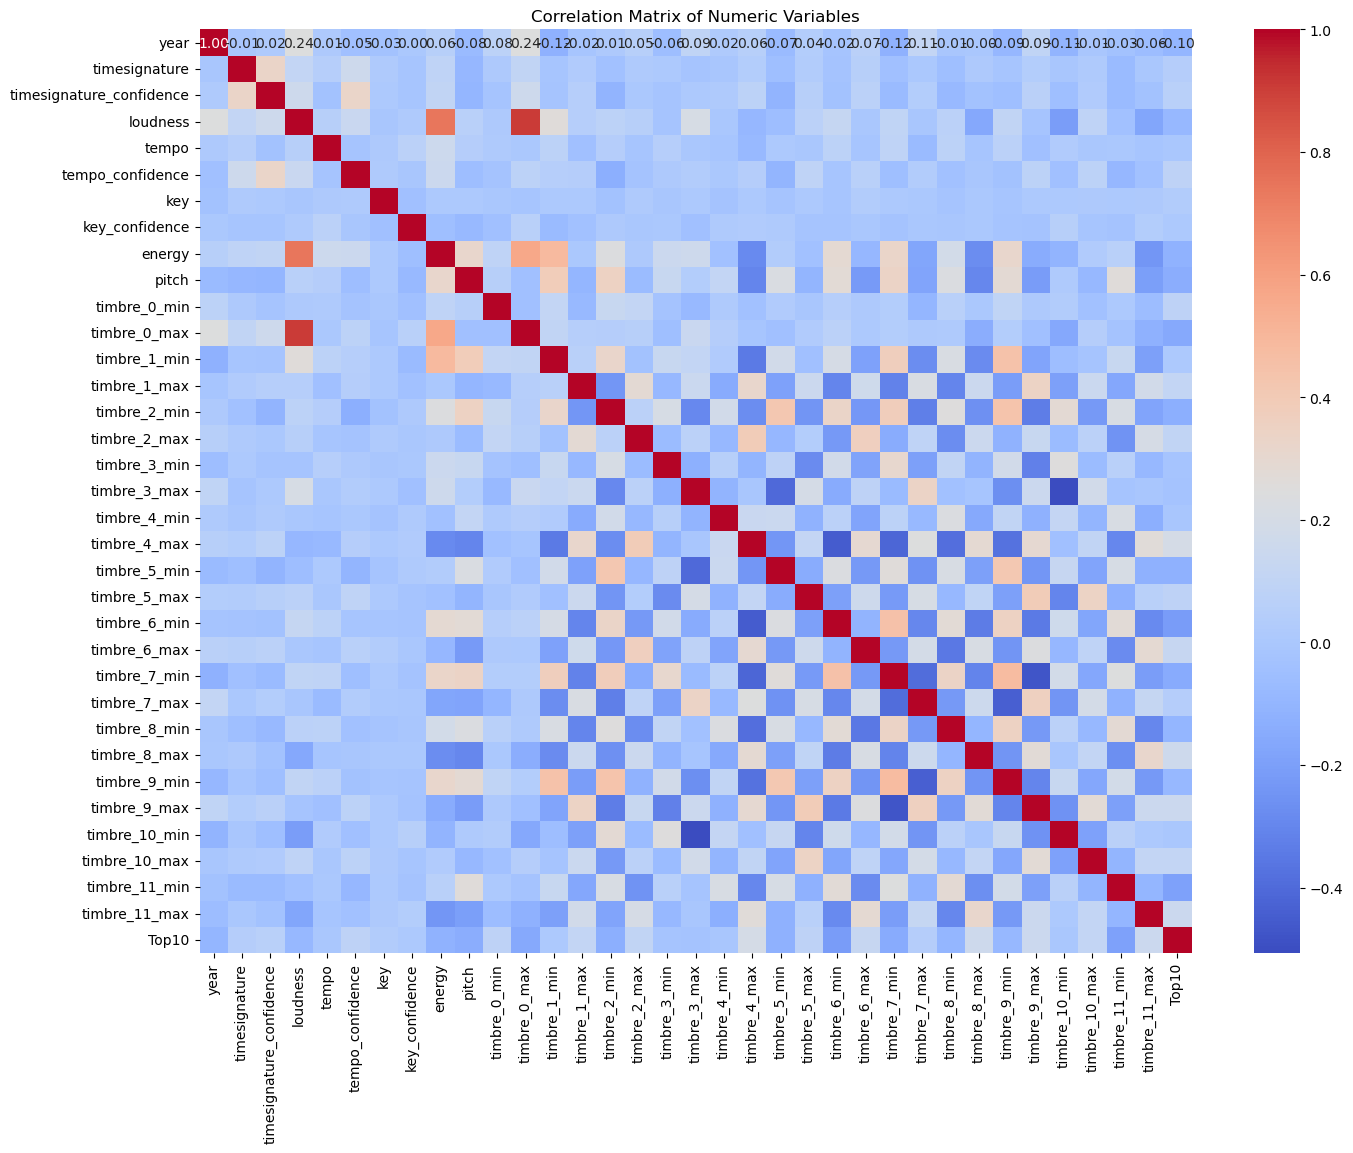

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# If you want to see correlations with a specific variable, for example 'Top10'
top10_correlation = correlation_matrix['Top10'].sort_values(ascending=False)


##### Generating visualization of distribution for variables other than timbre vectors

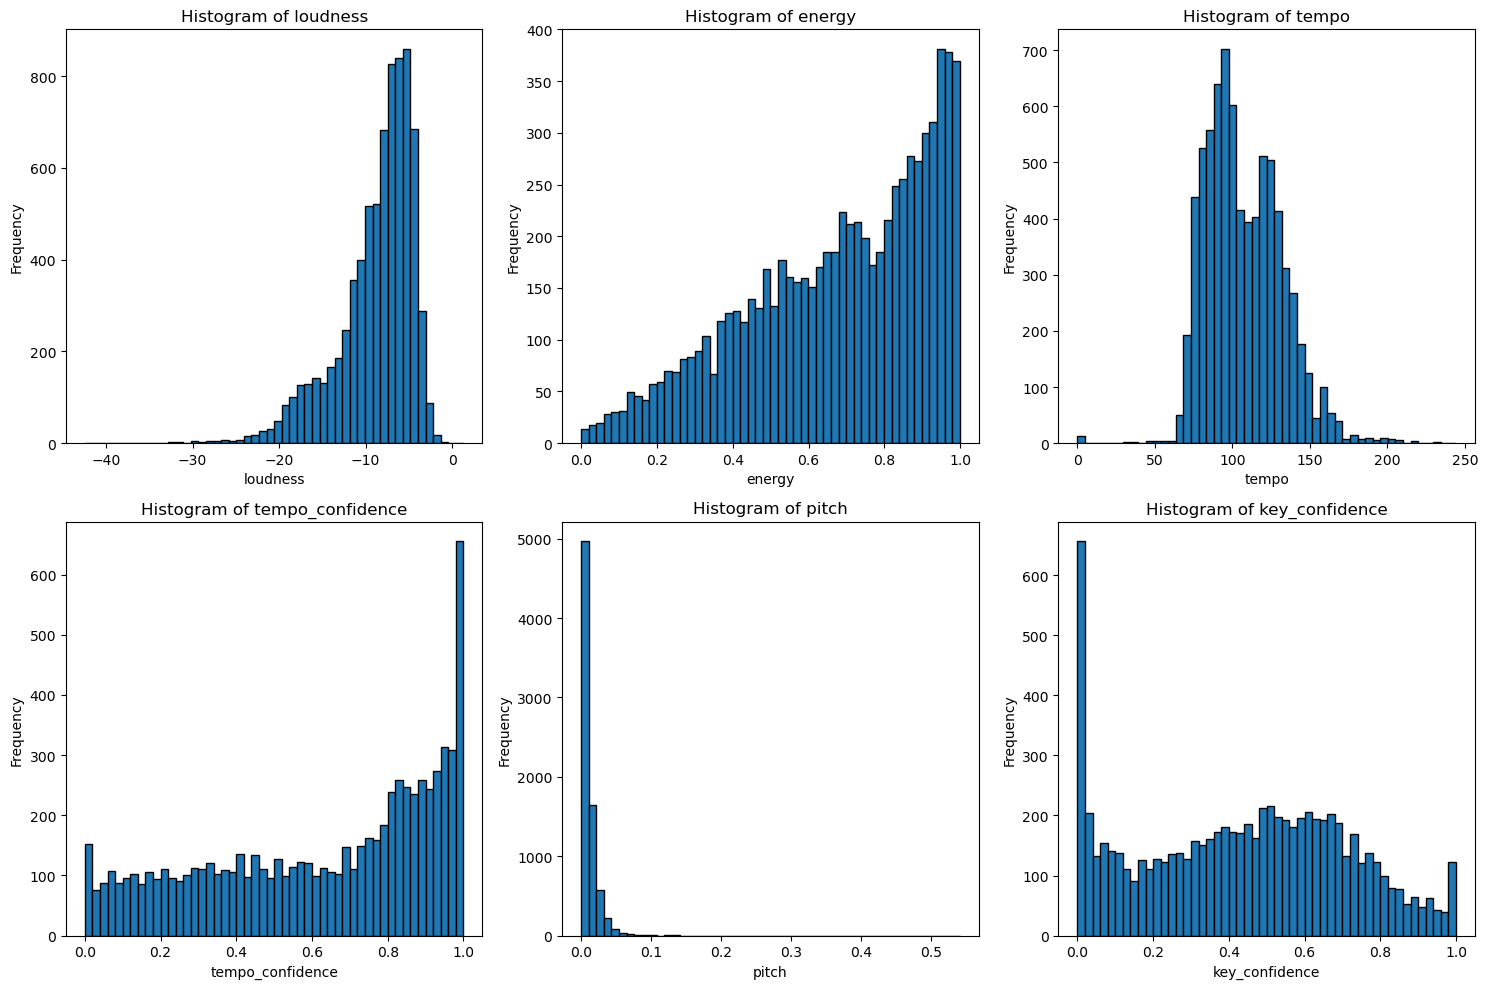

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Select the specific columns you want to visualize
selected_columns = ['loudness', 'energy', 'tempo', 'tempo_confidence', 'pitch', 'key_confidence']

# Set up the plotting area
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)  # 2 rows and 3 columns for a 2x3 grid layout
    plt.hist(df[col], bins=50, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Data Exploration Insights:
1) There are no null values in the dataset
2) Almost 15% of songs in the dataset are in top10
3) There are 1047 unique artists so the model is going to be complicated if we create dummy variables each artist seperately
4) There are some duplicate song IDs in the dataset
5) We have some highly correlated independent variables in out data set
   for example: timbre_0_max and loudness, loudness and energy etc.,
6) Some of the independent variables are skewed, which can lead to non-normal distribution of residuals and it can potentially reduce the accuracy of the model and cause model instability. We can apply log transformations on right skewed variables such as pitch, key_confidence and cube transformation on left skewed variables like
 energy, tempo_confidence, loudness.  

## Initial Model

In [21]:
# Splitting data into training and testing sets
train_df = df[df['year'] <= 2009]
test_df = df[df['year'] == 2010]

# we want to exclude some of the variables in our dataset from being used as independent variables
columns_to_exclude = ["songtitle", "artistname", "songID", "artistID"]

# To remove these variables from training and testing sets:
train_df = train_df.drop(columns=columns_to_exclude)
test_df = test_df.drop(columns=columns_to_exclude)

# Building a logistic regression model to predict Top10 using the training data.
X_train = train_df.drop(columns="Top10")
y_train = train_df["Top10"]

# Adding a constant column for the intercept
X_train_sm = sm.add_constant(X_train)

# Building the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Displaying the summary
result.summary()

Optimization terminated successfully.
         Current function value: 0.331692
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Top10   No. Observations:                 7201
Model:                          Logit   Df Residuals:                     7167
Method:                           MLE   Df Model:                           33
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.2061
Time:                        00:14:22   Log-Likelihood:                -2388.5
converged:                       True   LL-Null:                       -3008.8
Covariance Type:            nonrobust   LLR p-value:                1.634e-239
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
year                         0.0062      0.001      7.022      0.000       0.004       0.008
timesignature                0.1483      0.087      1.701      0.089      -0.023       0.319
timesignature_confidence     0.7391      0.195      3.787      0.000       0.357       1.122
loudness                     0.2648      0.028      9.342      0.000       0.209       0.320
tempo                        0.0006      0.002      0.344      0.731      -0.003       0.004
tempo_confidence             0.4954      0.142      3.490      0.000       0.217       0.774
key                          0.0167      0.010      1.615      0.106      -0.004       0.037
key_confidence               0.3101      0.141      2.201      0.028       0.034       0.586
energy                      -1.3593      0.308     -4.408      0.000      -1.964      -0.755
pitch                      -44.2179      6.817     -6.486      0.000     -57.579     -30.856
timbre_0_min                 0.0232      0.004      5.434      0.000       0.015       0.032
timbre_0_max                -0.3012      0.025    -11.952      0.000      -0.351      -0.252
timbre_1_min                 0.0061      0.001      7.799      0.000       0.005       0.008
timbre_1_max                -0.0003      0.001     -0.380      0.704      -0.002       0.001
timbre_2_min                -0.0022      0.001     -1.965      0.049      -0.004    -5.6e-06
timbre_2_max                 0.0006      0.001      0.663      0.507      -0.001       0.002
timbre_3_min                 0.0007      0.001      1.137      0.256      -0.000       0.002
timbre_3_max                -0.0029      0.001     -5.077      0.000      -0.004      -0.002
timbre_4_min                 0.0101      0.002      5.113      0.000       0.006       0.014
timbre_4_max                 0.0062      0.002      3.979      0.000       0.003       0.009
timbre_5_min                -0.0056      0.001     -4.403      0.000      -0.008      -0.003
timbre_5_max                 0.0001      0.001      0.175      0.861      -0.001       0.002
timbre_6_min                -0.0169      0.002     -7.460      0.000      -0.021      -0.012
timbre_6_max                 0.0037      0.002      1.675      0.094      -0.001       0.008
timbre_7_min                -0.0044      0.002     -2.498      0.012      -0.008      -0.001
timbre_7_max                -0.0037      0.002     -2.037      0.042      -0.007      -0.000
timbre_8_min                 0.0038      0.003      1.341      0.180      -0.002       0.009
timbre_8_max                 0.0046      0.003      1.547      0.122      -0.001       0.010
timbre_9_min                 0.0012      0.003      0.410      0.682      -0.005       0.007
timbre_9_max                 0.0018      0.002      0.727      0.467      -0.003       0.007
timbre_10_min                0.0041      0.002      2.240      0.025       0.001       0.008
timbre_10_max                0.0061      0.002      3.437      0.001       0.00

True or False?
##### 1. The higher our confidence about time signature, key and tempo, the more likely the song is to be in the Top 10
True. The variables key_confidence, tempo_confidence and timesignature_confidence have positive coefficients, which means the higher these values, the more likely song is to be in the Top10

##### 2. In general, if the confidence is low for the time signature, tempo, and key, then the song is more likely to be complex. What does our model suggest in terms of complexity?
The model does not explicitly measure musical complexity but suggests that songs with lower confidence in key, tempo, and time signature—potential indicators of complexity—are less likely to achieve Top 10 status. In the context of this model, higher musical complexity is inferred to be less popular with broader audiences, who may prefer more predictable and straightforward musical structures.


In [23]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Making predictions on the test set
X_test = test_df.drop(columns="Top10")
y_test = test_df["Top10"]

# Use the trained model to predict probabilities
y_pred_prob = result.predict(X_test)   # Probabilities of being in the "Top10" category

# Convert probabilities to class predictions based on a threshold (0.30 in this case)
predicted_classes = (y_pred_prob > 0.15).astype(int)


# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Extracting the values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Computing accuracy
test_accuracy = (predicted_classes == y_test).mean()

# Calculate sensitivity (recall or true positive rate)
sensitivity = TP / (TP + FN)

# Calculate specificity (true negative rate)
specificity = TN / (TN + FP)

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nTest Accuracy: {test_accuracy:.2f}")
print(f"Sensitivity (Recall or True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")

Confusion Matrix:
[[219  95]
 [ 11  48]]

Test Accuracy: 0.72
Sensitivity (Recall or True Positive Rate): 0.81
Specificity (True Negative Rate): 0.70


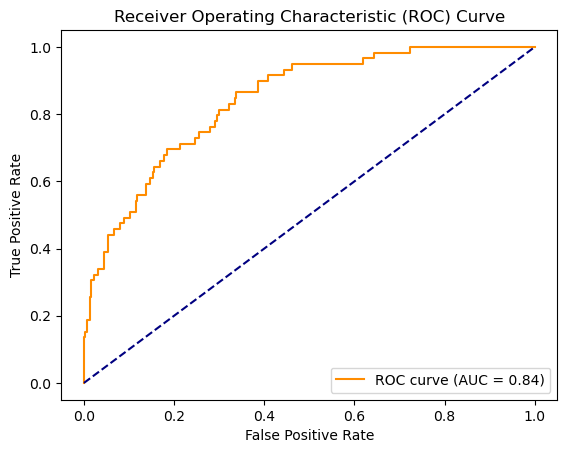

In [24]:
# Generating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Feature Engineering

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Load MusicRecords data from a CSV file
music_data = pd.read_csv("MusicData.csv", encoding='ISO-8859-1')


##### Apply log transformation to right-skewed variables
##### Apply cube transformation to right-skewed variables

In [28]:
# Apply log transformation to right-skewed variables
# Adding a small constant to avoid log(0) issues
music_data['log_pitch'] = np.log(music_data['pitch'] + 1)
music_data['log_key_confidence'] = np.log(music_data['key_confidence'] + 1)

# Apply cube transformation to left-skewed variables
music_data['cube_energy'] = np.power(music_data['energy'], 3)
music_data['cube_tempo_confidence'] = np.power(music_data['tempo_confidence'], 3)
music_data['cube_loudness'] = np.power(music_data['loudness'], 3)

music_data = music_data.drop(columns=['pitch', 'key_confidence', 'energy', 'tempo_confidence', 'loudness'])


##### In our dataset we have strong correlation between 'loudness' and 'energy'. The general trend is if the music is louder, it tends to be more energetic. 
##### It would be interesting to see if they have any synergy effect


In [30]:
music_data['energy_loudness'] = music_data['cube_energy']*music_data['cube_loudness']


##### Popular artists tend to have more hits. Extracting the artists who tend to have high number of songs in Top10
##### Creating a new binary variable 'popular_artist'

In [32]:
import pandas as pd

# Assuming your DataFrame is called `music_data`

# Filter the data for only Top 10 songs
top10_songs = music_data[music_data['Top10'] == 1]

# Count the number of Top 10 songs for each artist
popular_artists = top10_songs['artistname'].value_counts().head(50)

# Display the top 10 most popular artists
print("Top 5% Most Popular Artists Based on Top 10 Songs:")
print(popular_artists.head())

Top 5% Most Popular Artists Based on Top 10 Songs:
artistname
Mariah Carey    20
Madonna         18
Usher           14
Rihanna         11
Beyonce         10
Name: count, dtype: int64


In [33]:
music_data['popular_artist'] = music_data['artistname'].apply(lambda x:1 if x in popular_artists else 0)
music_data.head()

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,tempo,key,timbre_0_min,...,timbre_11_min,timbre_11_max,Top10,log_pitch,log_key_confidence,cube_energy,cube_tempo_confidence,cube_loudness,energy_loudness,popular_artist
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,91.525,11,0.002,...,-44.770,25.989,0,0.023717,0.373630,0.903265,0.865523,-77.417713,-69.928724,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,140.048,10,0.000,...,-38.892,22.513,0,0.024693,0.384582,0.954826,0.781230,-66.479345,-63.476231,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,160.512,2,0.003,...,-43.733,25.744,0,0.025668,0.189794,0.970006,0.116930,-45.537538,-44.171699,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,97.525,1,0.000,...,-59.439,37.082,0,0.012916,0.489806,0.828484,0.500566,-55.524368,-46.001058,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,140.053,6,0.000,...,-50.414,32.758,0,0.061095,0.394067,0.963662,0.023394,-104.287581,-100.497981,0


##### Songs that capture emotional aspects might influence a song's popularity
##### Creating a new variable 'has_keyword' to look for certain keywords

In [35]:
import pandas as pd

# Define the list of words to search for in the song titles
keywords = ['forever','you', 'me', 'love', 'romance', 'heart']

# Create a binary column 'has_keyword' based on whether the song title contains any of the keywords
music_data['has_keyword'] = music_data['songtitle'].str.contains('|'.join(keywords), case=False, regex=True).astype(int)

# Display the first few rows to verify
print(music_data[['songtitle', 'has_keyword']].head(10))

                            songtitle  has_keyword
0  This Is the House That Doubt Built            0
1                     Sticks & Bricks            0
2                          All I Want            0
3                    It's Complicated            0
4                           2nd Sucks            0
5                 Better Off This Way            0
6       All Signs Point to Lauderdale            0
7                         Out of Time            1
8                          If I Leave            0
9                Whataya Want From Me            1


### Model 1: Full feature model

In [37]:
# Splitting data into training and testing sets
train_df1 = music_data[music_data['year'] <= 2009]
test_df1 = music_data[music_data['year'] == 2010]



columns_to_exclude1 = ["songtitle", "artistname", "songID", "artistID"]
# "energy", "pitch", "timesignature_confidence", "tempo_confidence", "key_confidence","tempo",
# To remove these variables from training and testing sets:
train_df1 = train_df1.drop(columns=columns_to_exclude1)
test_df1 = test_df1.drop(columns=columns_to_exclude1)

# Building a logistic regression model to predict Top10 using the training data.
X_train1 = train_df1.drop(columns="Top10")
y_train1 = train_df1["Top10"]

# Building the logistic regression model using statsmodels
logit_model1 = sm.Logit(y_train1, X_train1)
result1 = logit_model1.fit()

# Displaying the summary
result1.summary()

Optimization terminated successfully.
         Current function value: 0.306133
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Top10   No. Observations:                 7201
Model:                          Logit   Df Residuals:                     7164
Method:                           MLE   Df Model:                           36
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.2673
Time:                        00:14:22   Log-Likelihood:                -2204.5
converged:                       True   LL-Null:                       -3008.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
year                         0.0019      0.001      2.736      0.006       0.001       0.003
timesignature                0.1832      0.090      2.040      0.041       0.007       0.359
timesignature_confidence     0.4883      0.201      2.433      0.015       0.095       0.882
tempo                        0.0017      0.002      0.938      0.348      -0.002       0.005
key                          0.0138      0.011      1.261      0.207      -0.008       0.035
timbre_0_min                 0.0254      0.005      5.605      0.000       0.017       0.034
timbre_0_max                -0.1944      0.023     -8.622      0.000      -0.239      -0.150
timbre_1_min                 0.0060      0.001      7.314      0.000       0.004       0.008
timbre_1_max                -0.0004      0.001     -0.470      0.638      -0.002       0.001
timbre_2_min                -0.0014      0.001     -1.177      0.239      -0.004       0.001
timbre_2_max                 0.0002      0.001      0.163      0.871      -0.002       0.002
timbre_3_min                 0.0005      0.001      0.770      0.441      -0.001       0.002
timbre_3_max                -0.0021      0.001     -3.457      0.001      -0.003      -0.001
timbre_4_min                 0.0067      0.002      3.232      0.001       0.003       0.011
timbre_4_max                 0.0064      0.002      3.893      0.000       0.003       0.010
timbre_5_min                -0.0044      0.001     -3.255      0.001      -0.007      -0.002
timbre_5_max              2.676e-05      0.001      0.032      0.974      -0.002       0.002
timbre_6_min                -0.0122      0.002     -5.101      0.000      -0.017      -0.008
timbre_6_max                 0.0023      0.002      0.989      0.323      -0.002       0.007
timbre_7_min                -0.0038      0.002     -2.003      0.045      -0.007    -8.1e-05
timbre_7_max                -0.0032      0.002     -1.666      0.096      -0.007       0.001
timbre_8_min                 0.0042      0.003      1.393      0.164      -0.002       0.010
timbre_8_max                 0.0049      0.003      1.575      0.115      -0.001       0.011
timbre_9_min                 0.0009      0.003      0.285      0.776      -0.005       0.007
timbre_9_max                 0.0016      0.003      0.638      0.523      -0.003       0.007
timbre_10_min                0.0038      0.002      1.965      0.049    9.78e-06       0.008
timbre_10_max                0.0068      0.002      3.642      0.000       0.003       0.010
timbre_11_min               -0.0293      0.004     -7.587      0.000      -0.037      -0.022
timbre_11_max                0.0157      0.004      4.376      0.000       0.009       0.023
log_pitch                  -37.9188      7.197     -5.269      0.000     -52.024     -23.814
log_key_confidence           0.5514      0.210      2.626      0.009       0.140       0.963
cube_energy                 -0.0950      0.227     -0.419      0.675      -0.53

In [38]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Making predictions on the test set
X_test1 = test_df1.drop(columns="Top10")
y_test1 = test_df1["Top10"]

# X_test_sm1 = sm.add_constant(X_test1)

# Use the trained model to predict probabilities
y_pred_prob1 = result1.predict(X_test1)   # Probabilities of being in the "Top10" category

# Convert probabilities to class predictions based on a threshold (0.30 in this case)
predicted_classes1 = (y_pred_prob1 > 0.15).astype(int)

# Creating a confusion matrix
conf_matrix1 = confusion_matrix(y_test1, predicted_classes1)

# Extracting the values from the confusion matrix
TN1, FP1, FN1, TP1 = conf_matrix1.ravel()

# Computing accuracy
test_accuracy1 = (predicted_classes1 == y_test1).mean()

# Calculate sensitivity (recall or true positive rate)
sensitivity1 = TP1 / (TP1 + FN1)

# Calculate specificity (true negative rate)
specificity1 = TN1 / (TN1 + FP1)

# Output the results
print("Confusion Matrix:")
print(conf_matrix1)
print(f"\nTest Accuracy: {test_accuracy1:.2f}")
print(f"Sensitivity (Recall or True Positive Rate): {sensitivity1:.2f}")
print(f"Specificity (True Negative Rate): {specificity1:.2f}")

Confusion Matrix:
[[239  75]
 [ 11  48]]

Test Accuracy: 0.77
Sensitivity (Recall or True Positive Rate): 0.81
Specificity (True Negative Rate): 0.76


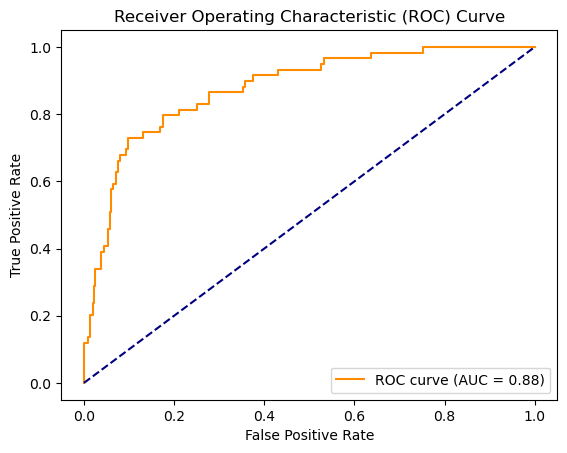

In [39]:
# Generating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Removing insignificant columns by performing Bottom-Up approacch, we get the below final model

### Model 2: Backward stepwise selection

In [42]:
# Splitting data into training and testing sets
train_df2 = music_data[music_data['year'] <= 2009]
test_df2 = music_data[music_data['year'] == 2010]

columns_to_exclude = ["songtitle", "artistname", "songID", "artistID"]

insignificant_variables = ["timbre_5_max","timbre_2_max","timbre_8_min","timbre_8_max","timbre_2_min","timbre_3_min", 
                           "timbre_1_max","key","timbre_9_min","timbre_9_max", "tempo","cube_energy",
                            "timbre_10_min","timbre_1_min","timbre_6_max", "energy_loudness",
                           "timbre_6_min","timbre_10_max","timbre_7_max","timbre_7_min"]
# "log_key_confidence","cube_tempo_confidence",

columns_to_drop =  columns_to_exclude + insignificant_variables

# To remove these variables from training and testing sets:
train_df2 = train_df2.drop(columns=columns_to_drop)
test_df2 = test_df2.drop(columns=columns_to_drop)

# Building a logistic regression model to predict Top10 using the training data.
X_train2 = train_df2.drop(columns="Top10")
y_train2 = train_df2["Top10"]


# Building the logistic regression model using statsmodels
logit_model2 = sm.Logit(y_train2, X_train2)
result2 = logit_model2.fit()

# Displaying the summary
result2.summary()

Optimization terminated successfully.
         Current function value: 0.317408
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Top10   No. Observations:                 7201
Model:                          Logit   Df Residuals:                     7184
Method:                           MLE   Df Model:                           16
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.2403
Time:                        00:14:23   Log-Likelihood:                -2285.7
converged:                       True   LL-Null:                       -3008.8
Covariance Type:            nonrobust   LLR p-value:                1.892e-298
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
year                         0.0018      0.001      3.177      0.001       0.001       0.003
timesignature                0.1995      0.089      2.240      0.025       0.025       0.374
timesignature_confidence     0.3828      0.195      1.958      0.050      -0.000       0.766
timbre_0_min                 0.0277      0.004      6.349      0.000       0.019       0.036
timbre_0_max                -0.1883      0.018    -10.490      0.000      -0.223      -0.153
timbre_3_max                -0.0017      0.000     -3.527      0.000      -0.003      -0.001
timbre_4_min                 0.0061      0.002      3.166      0.002       0.002       0.010
timbre_4_max                 0.0077      0.001      5.773      0.000       0.005       0.010
timbre_5_min                -0.0043      0.001     -3.457      0.001      -0.007      -0.002
timbre_11_min               -0.0336      0.004     -9.263      0.000      -0.041      -0.026
timbre_11_max                0.0190      0.003      5.812      0.000       0.013       0.025
log_pitch                  -39.3069      6.241     -6.298      0.000     -51.539     -27.075
log_key_confidence           0.4682      0.203      2.304      0.021       0.070       0.867
cube_tempo_confidence        0.6053      0.116      5.219      0.000       0.378       0.833
cube_loudness                0.0002   3.41e-05      5.773      0.000       0.000       0.000
popular_artist               2.2641      0.109     20.836      0.000       2.051       2.477
has_keyword                  0.5275      0.085      6.185      0.000       0.360       0.695
============================================================================================
"""

In [43]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Making predictions on the test set
X_test2 = test_df2.drop(columns="Top10")
y_test2 = test_df2["Top10"]


# Use the trained model to predict probabilities
y_pred_prob2 = result2.predict(X_test2)   # Probabilities of being in the "Top10" category

# Convert probabilities to class predictions based on a threshold (0.30 in this case)
predicted_classes2 = (y_pred_prob2 > 0.15).astype(int)

# Creating a confusion matrix
conf_matrix2 = confusion_matrix(y_test1, predicted_classes1)

# Extracting the values from the confusion matrix
TN2, FP2, FN2, TP2 = conf_matrix2.ravel()

# Computing accuracy
test_accuracy2 = (predicted_classes2 == y_test2).mean()

# Calculate sensitivity (recall or true positive rate)
sensitivity2 = TP2 / (TP2 + FN2)

# Calculate specificity (true negative rate)
specificity2= TN2 / (TN2 + FP2)

# Output the results
print("Confusion Matrix:")
print(conf_matrix2)
print(f"\nTest Accuracy: {test_accuracy2:.2f}")
print(f"Sensitivity (Recall or True Positive Rate): {sensitivity2:.2f}")
print(f"Specificity (True Negative Rate): {specificity2:.2f}")

Confusion Matrix:
[[239  75]
 [ 11  48]]

Test Accuracy: 0.77
Sensitivity (Recall or True Positive Rate): 0.81
Specificity (True Negative Rate): 0.76


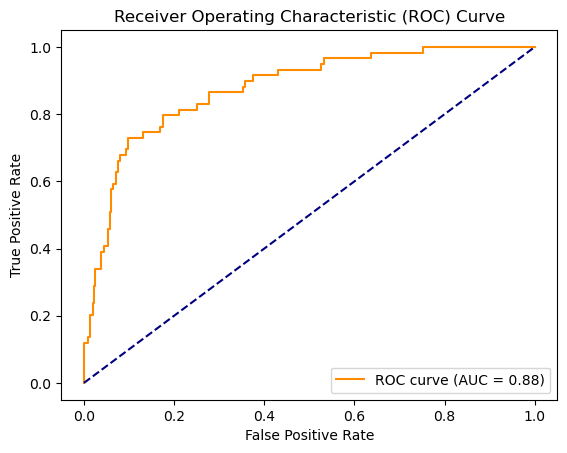

In [44]:
# Generating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Model 3: Principal Component Analysis

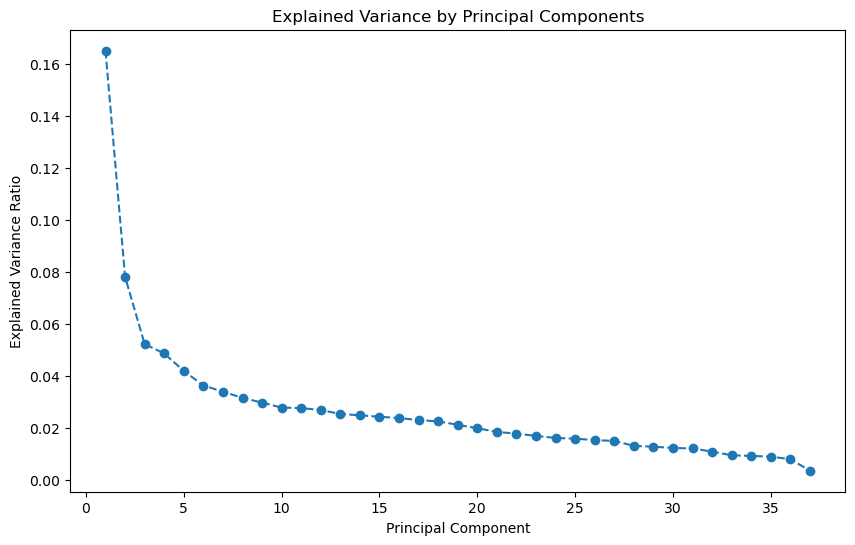

In [46]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

train_df3 = music_data[music_data['year'] <= 2009]
test_df3 = music_data[music_data['year'] == 2010]
columns_to_exclude = ["songtitle", "artistname", "songID", "artistID"]

train_df3 = train_df3.drop(columns=columns_to_exclude)
test_df3 = test_df3.drop(columns=columns_to_exclude)

# Prepare the data
X_train3 = train_df3.drop(columns="Top10")
y_train3 = train_df3["Top10"]

X_test3 = test_df3.drop(columns="Top10")
y_test3 = test_df3["Top10"]

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)

# Perform PCA
pca = PCA()  # Start by fitting PCA with all components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot the explained variance for all components
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()



In [47]:
# Select a subset of principal components (e.g., first 4 components)
n_components = 10
X_train_pca_subset = X_train_pca[:, :n_components]
X_test_pca_subset = X_test_pca[:, :n_components]

# Fit the Logistic Regression Model using the subset of principal components
log_reg = LogisticRegression()
log_reg.fit(X_train_pca_subset, y_train)

# Predict and Evaluate
y_pred = log_reg.predict(X_test_pca_subset)
# Convert probabilities to class predictions based on a threshold (0.30 in this case)
predicted_classes = (y_pred > 0.15).astype(int)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Extracting the values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Computing accuracy
test_accuracy = (predicted_classes == y_test).mean()

# Calculate sensitivity (recall or true positive rate)
sensitivity = TP / (TP + FN)

# Calculate specificity (true negative rate)
specificity = TN / (TN + FP)

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nTest Accuracy: {test_accuracy:.2f}")
print(f"Sensitivity (Recall or True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")

Confusion Matrix:
[[307   7]
 [ 47  12]]

Test Accuracy: 0.86
Sensitivity (Recall or True Positive Rate): 0.20
Specificity (True Negative Rate): 0.98


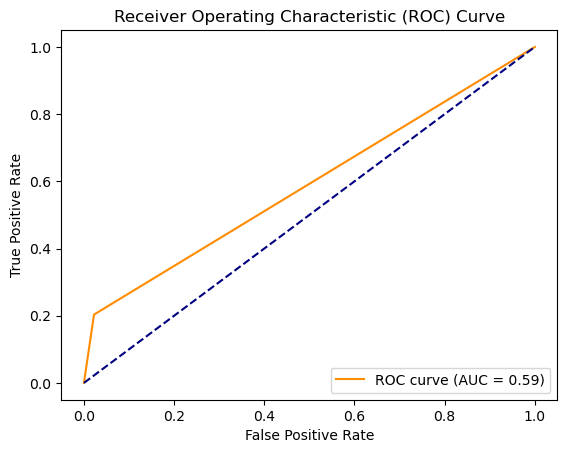

In [48]:
# Generating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()